# Лабораторная работа №2

#### Импорт ввсех необходимых модулей

In [1]:
#! /usr/bin/env pthon3
# -*- coding: utf-8 -*-

In [2]:
from ipywidgets import interact
from ipywidgets import widgets 
from IPython.display import display
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes
from matplotlib import rcParams, rc
from random import uniform

rcParams['figure.figsize'] = (20.0, 10.0)
rcParams['font.size'] = 12
plt.style.use('bmh')

## *Задание №4*

<function __main__.get_results>

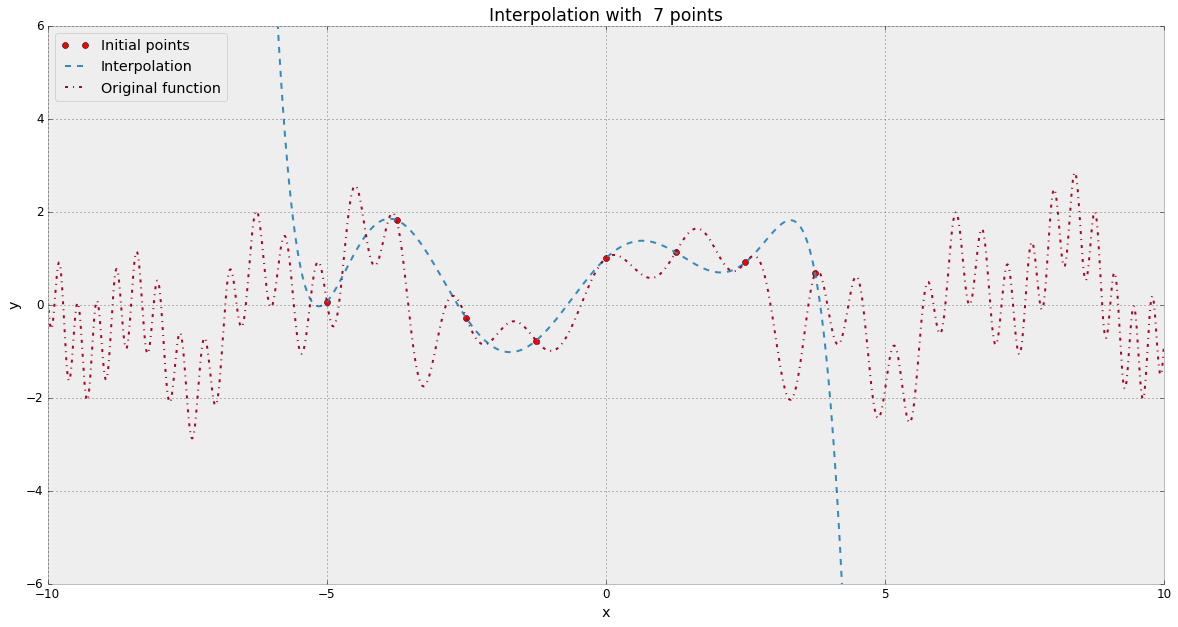

In [3]:
original_function = lambda t:  np.sin(t)+np.sin(t**2)+np.cos(3*t)

def get_interpolation_function(initial_x, initial_y):
    order = len(initial_x)
    matrix_a = []
    array_b = []
    for x,y in zip(initial_x, initial_y):
        array_b.append(y)
        matrix_a.append([ x**index for index  in range(order)])
    roots = np.linalg.solve(matrix_a, array_b)
    return np.vectorize(lambda x: np.sum(np.array([roots[index]*x**index for index in range(order)])))

range_start = -10
range_end = 10

def get_results(step_count):
    fig = plt.figure(0)
    ax = fig.add_subplot(1,1,1)
    ax.set_ylim([-6,6])
    ax.set_title(r"Interpolation with {0:2.0f} points".format(step_count))

    interpolation_points_step = 10 / (step_count+1)
    initial_x = np.arange(range_start+5, range_end-5, interpolation_points_step)
    initial_y = original_function(initial_x)
    ax.plot(initial_x, initial_y, 'ro', label='Initial points')

    interpolation_function = get_interpolation_function(initial_x, initial_y)
    interpolation_x = np.arange(range_start,range_end,0.009)
    interpolation_y = interpolation_function(interpolation_x)
    ax.plot(interpolation_x, interpolation_y, '--', label='Interpolation')

    original_x = np.arange(range_start,range_end,0.009)
    original_y = original_function(original_x)
    ax.plot(original_x, original_y, '-.', label='Original function')
    
    ax.legend(loc='upper left')
    plt.xlabel(r'x')
    plt.ylabel(r'y')

interact(get_results, step_count=widgets.IntSlider(min=2,max=100,step=1,value=7))